<a href="https://colab.research.google.com/github/ph-lima/meu-projeto-analise/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTRUTURA DO PROJETO**

**PASSO 1 - Importar as bibliotecas necessárias**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
import numpy as np

**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**

In [ ]:
lista_planilhas = os.listdir('/content/drive/MyDrive/python para ciencia de dados/projeto2/arquivos')
display(lista_planilhas)

['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
# Estrutura de repetição
# Estrutura condicional

In [ ]:
total_vendas = pd.DataFrame()

for planilha in lista_planilhas:
  if 'Vendas' in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/python para ciencia de dados/projeto2/arquivos/{planilha}')
    total_vendas = pd.concat([total_vendas, tabela])

display(total_vendas)

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**

In [ ]:
total_devolucoes = pd.DataFrame()

for planilha in lista_planilhas:
  if 'Devolucoes' in planilha:
    tabela = pd.read_csv(f'/content/drive/MyDrive/python para ciencia de dados/projeto2/arquivos/{planilha}')
    total_devolucoes = pd.concat([total_devolucoes, tabela])

display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**

**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
quantidade_produto_vl = total_vendas[['Produto', 'Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade', ascending=False)

quantidade_loja_vl = total_vendas[['Loja','Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de Vendas Liquidas por loja</h2>'))
display(quantidade_loja_vl.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de Vendas Liquidas por produto</h2>'))
display(quantidade_produto_vl.head(3))

,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


,Quantidade
Produto,
iPhone,8974
Televisão,5931
Notebook,3249


In [ ]:
# grafico de pizza ou torta
grafico1 = px.pie(quantidade_produto_vl.reset_index(), names='Produto', values='Quantidade', title='Quantidade de Vendas Liquidas por produto')
grafico1.update_traces(textposition='inside', textinfo='percent+label')
grafico1.show()

# grafico de barra
grafico2 = px.bar(quantidade_loja_vl.reset_index(), x='Loja', y='Quantidade', title='Quantidade de Vendas Liquidas por loja', color = 'Quantidade')
grafico2.show()

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.

In [ ]:
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas,total_devolucoes]).groupby(['SKU','Produto'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

quantidade_loja_vb = pd.DataFrame(pd.concat([total_vendas,total_devolucoes]).groupby(['Loja'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de Vendas Bruta por loja</h2>'))
display(quantidade_loja_vb.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de Vendas Bruta por produto</h2>'))
display(quantidade_produto_vb.head(3))

,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


In [ ]:
# grafico de barra
grafico3 = px.bar(
    quantidade_produto_vb.reset_index(),
    x='Produto',
    y='Quantidade',
    title='Quantidade de Vendas Bruta por produto',
    color = 'Produto'
)

grafico3.update_xaxes(categoryorder='total descending')

grafico3.update_layout (
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font_color='#ffffff'
)


grafico3.show()

grafico4 = px.bar(
    quantidade_loja_vb.reset_index(),
    x='Loja',
    y='Quantidade',
    title='Quantidade de Vendas Bruta por loja',
    color = 'Loja'
)

grafico4.update_layout (
    xaxis={
        "tickfont": {
            "color": 'blue',
            "size": 14
        },
        "title": {
            "font": {
                "color": 'orange',
                "size": 18
            }
        }
    },
    yaxis={
        "tickfont": {
            "color": 'red',
            "size": 14
        },
        "title": {
            "font": {
                "color": 'violet',
                "size": 18
            }
        }
    }
)

grafico4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.

In [ ]:
quantidade_produto_d = total_devolucoes[['Produto', 'Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade', ascending=False)

quantidade_loja_d = total_devolucoes[['Loja','Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de Devoluções por loja</h2>'))
display(quantidade_loja_d.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de Devoluções por produto</h2>'))
display(quantidade_produto_d.head(3))

,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


Text(0.5, 1.0, 'Quantidade de Devoluções por Produto e Loja')

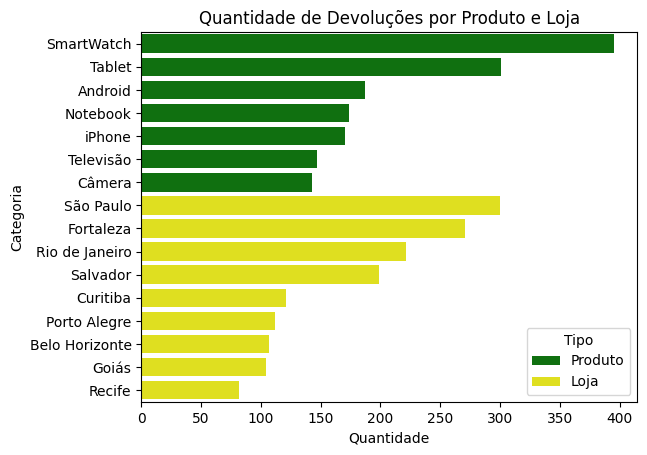

In [ ]:
quantidade_produto_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_produto_d.index,
        'Quantidade': quantidade_produto_d['Quantidade'],
        'Tipo': ['Produto']* len(quantidade_produto_d)
    }
)

quantidade_loja_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_loja_d.index,
        'Quantidade': quantidade_loja_d['Quantidade'],
        'Tipo': ['Loja']* len(quantidade_loja_d)
    }
)

# concatenar os DataFrames
df_concatenado = pd.concat([quantidade_produto_d_grafico, quantidade_loja_d_grafico])

cores = {
    'Produto': 'green',
    'Loja': 'yellow'
}

# plotar o grafico de barras horizontais
grafico5 = sns.barplot(data=df_concatenado, x='Quantidade', y='Categoria', hue='Tipo', orient='h', palette=cores)
grafico5.set_title('Quantidade de Devoluções por Produto e Loja')
# grafico5.set_xlabel('Rotulo do eixo x')
# grafico5.set_ylabel('Rotulo do eixo y')




**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.

In [ ]:
total_vendas['Data'] = pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')
vendas_mensais = pd.DataFrame(
    {
        'Data': total_vendas['Data'],
        'Quantidade': total_vendas['Quantidade']
    }
)

vendas_mensais = vendas_mensais.set_index('Data').resample('M').sum()
vendas_mensais.index = vendas_mensais.index.strftime('%b/%Y')

vendas_mensais['Variação'] = vendas_mensais['Quantidade'].diff()

display(HTML('<h2>Variação de quantidade de produtos vendidos por mês</h2>'))
display(vendas_mensais)

<ipython-input-76-1d8af87fb66c>:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,Quantidade,Variação
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [ ]:
# grafico de linha
text_color = np.where(vendas_mensais['Variação'] < 0, 'red', 'blue')

grafico6 = px.line(
    vendas_mensais.reset_index(),
    x='Data',
    y='Quantidade',
    title='Vendas Mensais x Sazonalidades', markers=True, text=vendas_mensais['Quantidade'])
grafico6.update_traces(textposition='top center', textfont =dict(color=text_color, size=15), marker=dict(color=text_color))

grafico6.show()

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.

In [ ]:
faturamento_trimestral = pd.DataFrame(
    {
        'Data': total_vendas['Data'],
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitário': total_vendas['Valor Unitário'],
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }
)

faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')

faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())

display(HTML('<h2>Faturamento Trimestral</h2>'))
display(faturamento_trimestral_resampled)

,Quantidade,Valor Unitário,Faturamento
Data,,,
2023-03-31,7599,8254700,25038900
2023-06-30,7307,8107900,24163700
2023-09-30,7512,8366500,24970600
2023-12-31,7625,8272200,25146300


In [ ]:
# grafico de area
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

grafico7 = px.area(
    faturamento_trimestral.reset_index(),
    x='Trimestre',
    y='Faturamento',
    title='Faturamento Trimestral',
    markers=True
)

grafico7.update_layout(
    xaxis_title='titulo eixo x',
    yaxis_title='titulo eixo y',
    margin=dict(l=300, r=300, t=50, b=50),
    title=dict(x=0)
)

grafico7.update_traces(
    fillcolor= 'rgba(27, 239, 143, 0.2)',
    line_color= 'rgba(27, 239, 143, 1)',
    marker=dict(color=text_color)
)

grafico7.show()